In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
df_da_ger = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Germany')]

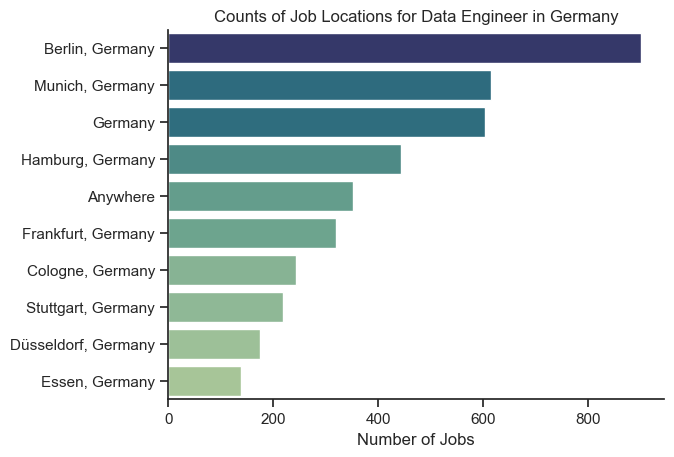

In [31]:
df_plot = df_da_ger['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='crest', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Engineer in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

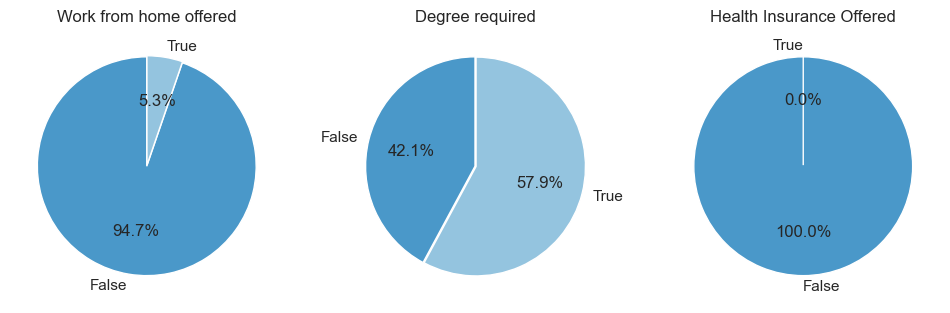

In [29]:
dict_column = {
    'job_work_from_home' : 'Work from home offered',
    'job_no_degree_mention' : 'Degree required',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    
    counts = df_da_ger[column].value_counts()

    # Sicherstellen, dass True und False immer beide vorhanden sind
    counts = counts.reindex([False, True], fill_value=0)

    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90,
         colors=cm.Blues([0.6, 0.4]), 
         explode=(0, 0.01)
    )
    ax[i].set_title(title)


plt.show()

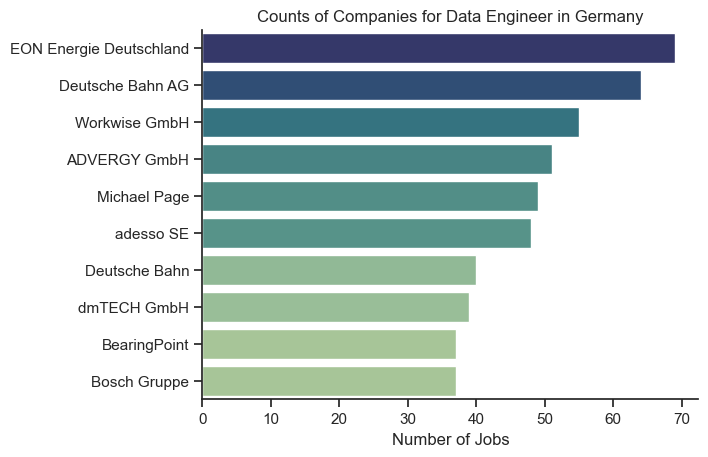

In [33]:
df_plot = df_da_ger['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='crest', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Engineer in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()